# <span style="color:#336699">CAP394 - Introdução à Data Science 
<hr style="border:1px solid #0077b9;">

Professores:
- Rafael Santos
- Gilberto Ribeiro de Queiroz

Discente:
- Camila Pereira Sales

## <span style="color:#336699">Projeto Final</span>



### <span style="color:#336699">Introdução</span>
<hr>
Este projeto tem como objetivo relizar análise dos dados da área de Engenharia de Software, a aprtir deste dados busca-se verificar a existência de padrões entre os dados.


### <span style="color:#336699">Dados</span>
<hr>
Os dados utilizados neste projeto foram obtidos do Repositório de Engenharia de Software Promise. <br>
Neste repositório estão disponiveis o resultado da aplicação de algumas métricas de software.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import glob, os

<br>
Listagem dos datasets presentes na pasta, todos estão em formato arff.

In [2]:
path = os.getcwd()
os.chdir("dataset1")
files = []
for file in glob.glob("*.arff"):
    files.append(file)
    print(file)

CM1.arff
KC3.arff
KC4.arff
MC1.arff
MC2.arff
MW1.arff
PC1.arff
PC2.arff
PC3.arff
PC4.arff
PC5.arff


<br>
Conteudo do arquivo KC4.

In [3]:
KC4 = open("KC4.arff", 'r')
content = KC4.read()
print(content)


@relation 'KC4'

@attribute LOC_BLANK numeric
@attribute BRANCH_COUNT numeric
@attribute CALL_PAIRS numeric
@attribute LOC_CODE_AND_COMMENT numeric
@attribute LOC_COMMENTS numeric
@attribute CONDITION_COUNT numeric
@attribute CYCLOMATIC_COMPLEXITY numeric
@attribute CYCLOMATIC_DENSITY numeric
@attribute DECISION_COUNT numeric
@attribute DECISION_DENSITY numeric
@attribute DESIGN_COMPLEXITY numeric
@attribute DESIGN_DENSITY numeric
@attribute EDGE_COUNT numeric
@attribute ESSENTIAL_COMPLEXITY numeric
@attribute ESSENTIAL_DENSITY numeric
@attribute LOC_EXECUTABLE numeric
@attribute PARAMETER_COUNT numeric
@attribute GLOBAL_DATA_COMPLEXITY numeric
@attribute GLOBAL_DATA_DENSITY numeric
@attribute HALSTEAD_CONTENT numeric
@attribute HALSTEAD_DIFFICULTY numeric
@attribute HALSTEAD_EFFORT numeric
@attribute HALSTEAD_ERROR_EST numeric
@attribute HALSTEAD_LENGTH numeric
@attribute HALSTEAD_LEVEL numeric
@attribute HALSTEAD_PROG_TIME numeric
@attribute HALSTEAD_VOLUME numeric
@attribute MAINTEN

Os dados não podem ser analisados como estão pois todos os arquivos contém o mesmo texto inicial exposto anteriormente. <br>
A função abaixo é responsável por remover as linhas que não correspondem a dados e criar arquivos csv com o cabeçalho e dados formatados.

In [23]:
def cleanDataset(file):
    f = open(file)
    newfilename = file.split('.')
    output = []
    i = 0;

    for line in f:
        if(i>44):
            output.append(line)
        i = i+1
    
    f.close()
    newfile = open(newfilename[0]+".csv", 'w+')
    if(newfilename[0]!= "MC1") and (newfilename[0]!= "PC5"):
        newfile.write("LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective"+"\n")
    else:
        newfile.write("LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective"+"\n")

    newfile.writelines(output)
    f.close()

É necessário chamar a função criada passando como parrametro cada um dos arquivos do diretório.

In [24]:
for file in files:
    cleanDataset(file)

Após a execução da função pode-se observar que os arquivos csv foram criados.

In [25]:
os.chdir(os.getcwd())
for file in glob.glob("*.csv"):
    print(file)

CM1.csv
KC3.csv
KC4.csv
MC1.csv
MC2.csv
MW1.csv
PC1.csv
PC2.csv
PC3.csv
PC4.csv
PC5.csv


Os datasets MC1 e PC5 não tem a coluna DECISION_DENSITY, então esta coluna será removida para que os datasets possam ser unificados.

In [7]:
CM1 = pd.read_csv('CM1.csv').drop('DECISION_DENSITY',axis=1)
KC3 = pd.read_csv('KC3.csv').drop('DECISION_DENSITY',axis=1)
KC4 = pd.read_csv('KC4.csv').drop('DECISION_DENSITY',axis=1)
MC1 = pd.read_csv('MC1.csv')
MW1 = pd.read_csv('MC2.csv').drop('DECISION_DENSITY',axis=1)
MC2 = pd.read_csv('MC2.csv').drop('DECISION_DENSITY',axis=1)
PC1 = pd.read_csv('PC1.csv').drop('DECISION_DENSITY',axis=1)
PC2 = pd.read_csv('PC2.csv').drop('DECISION_DENSITY',axis=1)
PC3 = pd.read_csv('PC3.csv').drop('DECISION_DENSITY',axis=1)
PC4 = pd.read_csv('PC4.csv').drop('DECISION_DENSITY',axis=1)
PC5 = pd.read_csv('PC5.csv')

Nos datasets, não está presente a linguagem de cada software, mas para a análise pode ser interessante analisa-la também, então para isso foram adicionadas de acordo com as descrita em (Gray et al. 2011).  

In [8]:
CM1['LANGUAGE'] = "C"
KC3['LANGUAGE'] = "Java"
KC4['LANGUAGE'] = "Perl"
MC1['LANGUAGE'] = "C - C++"
MC2['LANGUAGE'] = "C++"
MW1['LANGUAGE'] = "C"
PC1['LANGUAGE'] = "C"
PC2['LANGUAGE'] = "C"
PC3['LANGUAGE'] = "C"
PC4['LANGUAGE'] = "C"
PC5['LANGUAGE'] = "C++"

Para unificar os datasets e manter o software que cada dataset está relacionado, foi adicionado mais uma coluna contendo esta informação.

In [9]:
CM1['SOFTWARE'] = "CM1"
KC3['SOFTWARE'] = "KC3"
KC4['SOFTWARE'] = "KC4"
MC1['SOFTWARE'] = "MC1"
MC2['SOFTWARE'] = "MC2"
MW1['SOFTWARE'] = "MW1"
PC1['SOFTWARE'] = "PC1"
PC2['SOFTWARE'] = "PC2"
PC3['SOFTWARE'] = "pC3"
PC4['SOFTWARE'] = "PC4"
PC5['SOFTWARE'] = "PC5"

Após adicionar as informações descritas anteriormente, é possivel realizar a junção dos datasets.

In [10]:
data = pd.concat([CM1,KC3,KC4,MC2,MW1,PC1,PC2,PC3,PC4,PC5], ignore_index=True, sort=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28313 entries, 0 to 28312
Data columns (total 42 columns):
BRANCH_COUNT                       28313 non-null int64
CALL_PAIRS                         28313 non-null int64
CONDITION_COUNT                    28313 non-null int64
CYCLOMATIC_COMPLEXITY              28313 non-null int64
CYCLOMATIC_DENSITY                 28313 non-null float64
DECISION_COUNT                     28313 non-null int64
DESIGN_COMPLEXITY                  28313 non-null int64
DESIGN_DENSITY                     28313 non-null float64
Defective                          28313 non-null object
EDGE_COUNT                         28313 non-null int64
ESSENTIAL_COMPLEXITY               28313 non-null int64
ESSENTIAL_DENSITY                  28313 non-null float64
GLOBAL_DATA_COMPLEXITY             28313 non-null int64
GLOBAL_DATA_DENSITY                28313 non-null float64
HALSTEAD_CONTENT                   28313 non-null float64
HALSTEAD_DIFFICULTY                28313

In [12]:
data.head()

,BRANCH_COUNT,CALL_PAIRS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,DESIGN_DENSITY,Defective,EDGE_COUNT,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUMBER_OF_LINES,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,PARAMETER_COUNT,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,SOFTWARE
0,9,2,16,5,0.20,8,3,0.6,N,17,...,0.16,32,19,44,15,15,3,1,4.00,CM1
1,7,3,12,4,0.13,6,2,0.5,Y,17,...,0.06,67,51,90,32,27,1,1,39.22,CM1
2,9,1,16,5,0.15,8,3,0.6,Y,18,...,0.06,83,37,74,33,22,0,1,47.27,CM1
3,1,2,0,1,0.14,0,1,1.0,N,3,...,0.11,9,5,6,5,4,1,1,0.00,CM1
4,3,2,4,2,0.17,2,2,1.0,N,6,...,0.10,20,9,14,7,10,2,1,0.00,CM1


In [13]:
data.columns

Index(['BRANCH_COUNT', 'CALL_PAIRS', 'CONDITION_COUNT',
       'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT',
       'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'Defective', 'EDGE_COUNT',
       'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'GLOBAL_DATA_COMPLEXITY',
       'GLOBAL_DATA_DENSITY', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY',
       'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH',
       'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'LANGUAGE',
       'LOC_BLANK', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'LOC_EXECUTABLE',
       'LOC_TOTAL', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT',
       'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT',
       'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUMBER_OF_LINES', 'NUM_OPERANDS',
       'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS',
       'PARAMETER_COUNT', 'PATHOLOGICAL_COMPLEXITY', 'PERCENT_COMMENTS',
       'SOFTWARE'],
      dtype='object')

Após a junção é interessante saber a quantidade de registros referente a cada linguaguem e software.

In [14]:
data['LANGUAGE'].value_counts()

C++     17347
C       10383
Java      458
Perl      125
Name: LANGUAGE, dtype: int64

In [15]:
data['SOFTWARE'].value_counts()

PC5    17186
PC2     5589
pC3     1563
PC4     1458
PC1     1107
CM1      505
KC3      458
MC2      161
MW1      161
KC4      125
Name: SOFTWARE, dtype: int64

A relação de observações que apresentaram ou não falha.

In [16]:
data['Defective'].value_counts()

N    27104
Y     1209
Name: Defective, dtype: int64

Matriz de correlação dos dados.

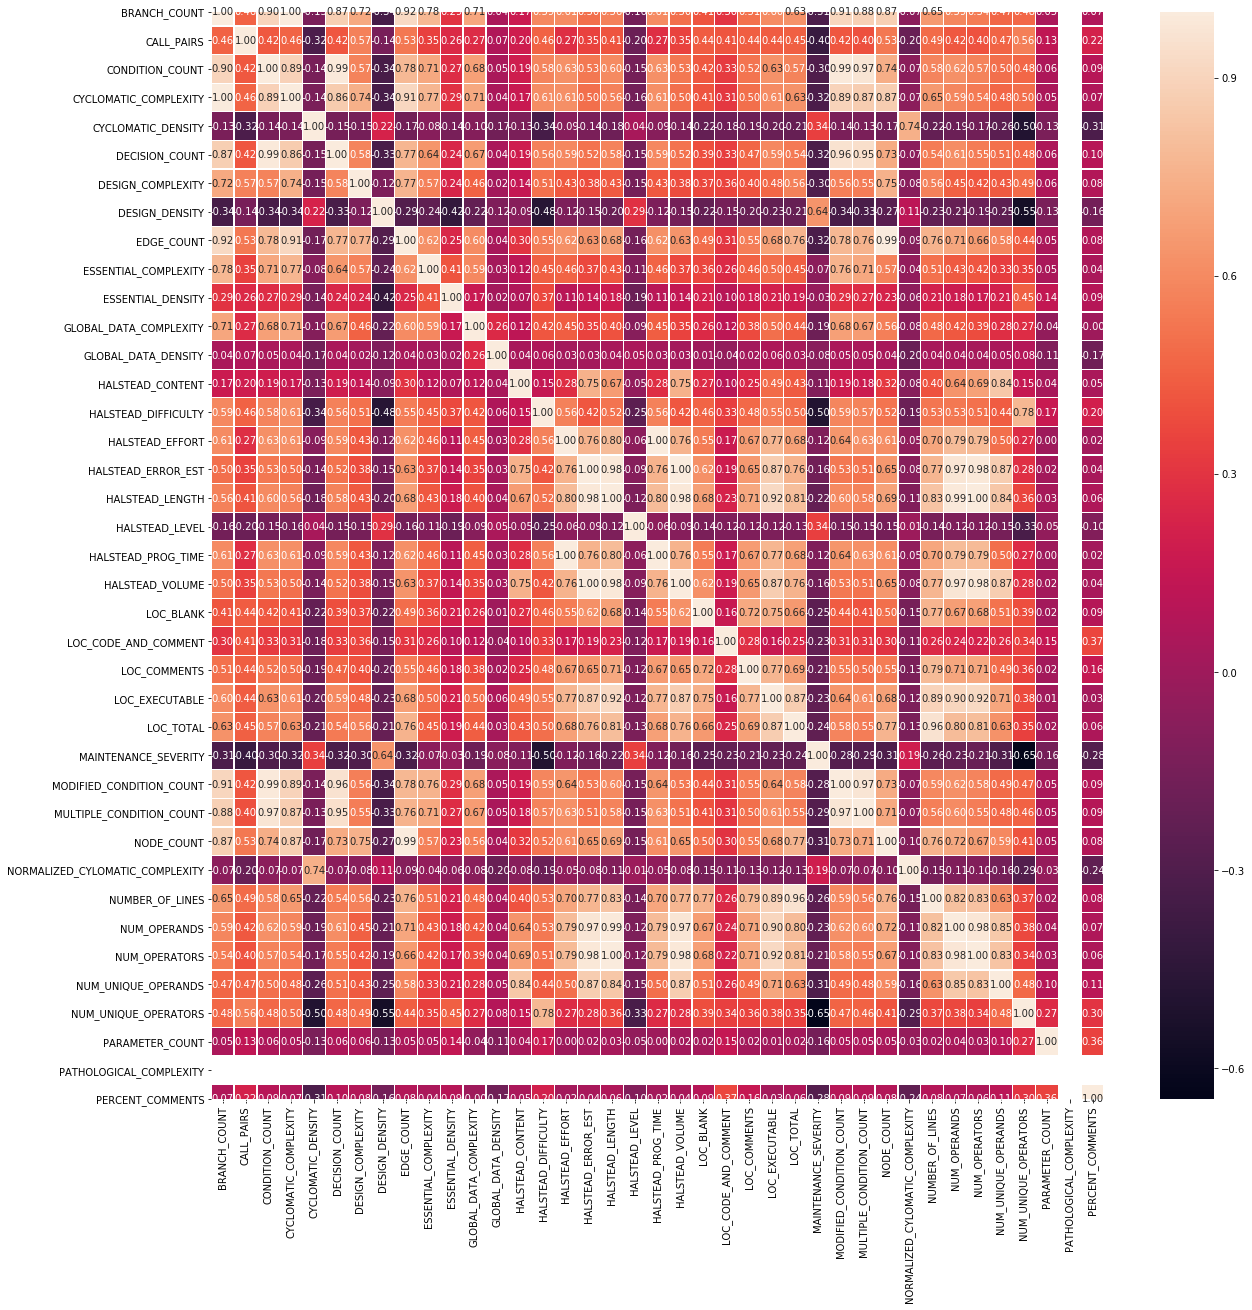

In [17]:
f,ax = plt.subplots(figsize = (20, 20))
sns.heatmap(data.corr(), annot = True, linewidths = .2, fmt = '.2f')
plt.show()

Como se pode observar as linguagens que tem mais dados são C++ e C, tendo uma grande diferença entre os valores das outras, tendo isso em vista talvez seja interessnte analisar somente os software relativos a estas duas linguagens.<br>
Por isso foi griado o subconjunto somente com estas informações.

In [18]:
newData = pd.concat([PC1,PC2,PC3,PC4,PC5, MC2, CM1, MW1], ignore_index=True, sort=True)

In [19]:
newData['LANGUAGE'].value_counts()

C++    17347
C      10383
Name: LANGUAGE, dtype: int64

In [20]:
newData['SOFTWARE'].value_counts()

PC5    17186
PC2     5589
pC3     1563
PC4     1458
PC1     1107
CM1      505
MC2      161
MW1      161
Name: SOFTWARE, dtype: int64

In [21]:
newData['Defective'].value_counts()

N    26625
Y     1105
Name: Defective, dtype: int64

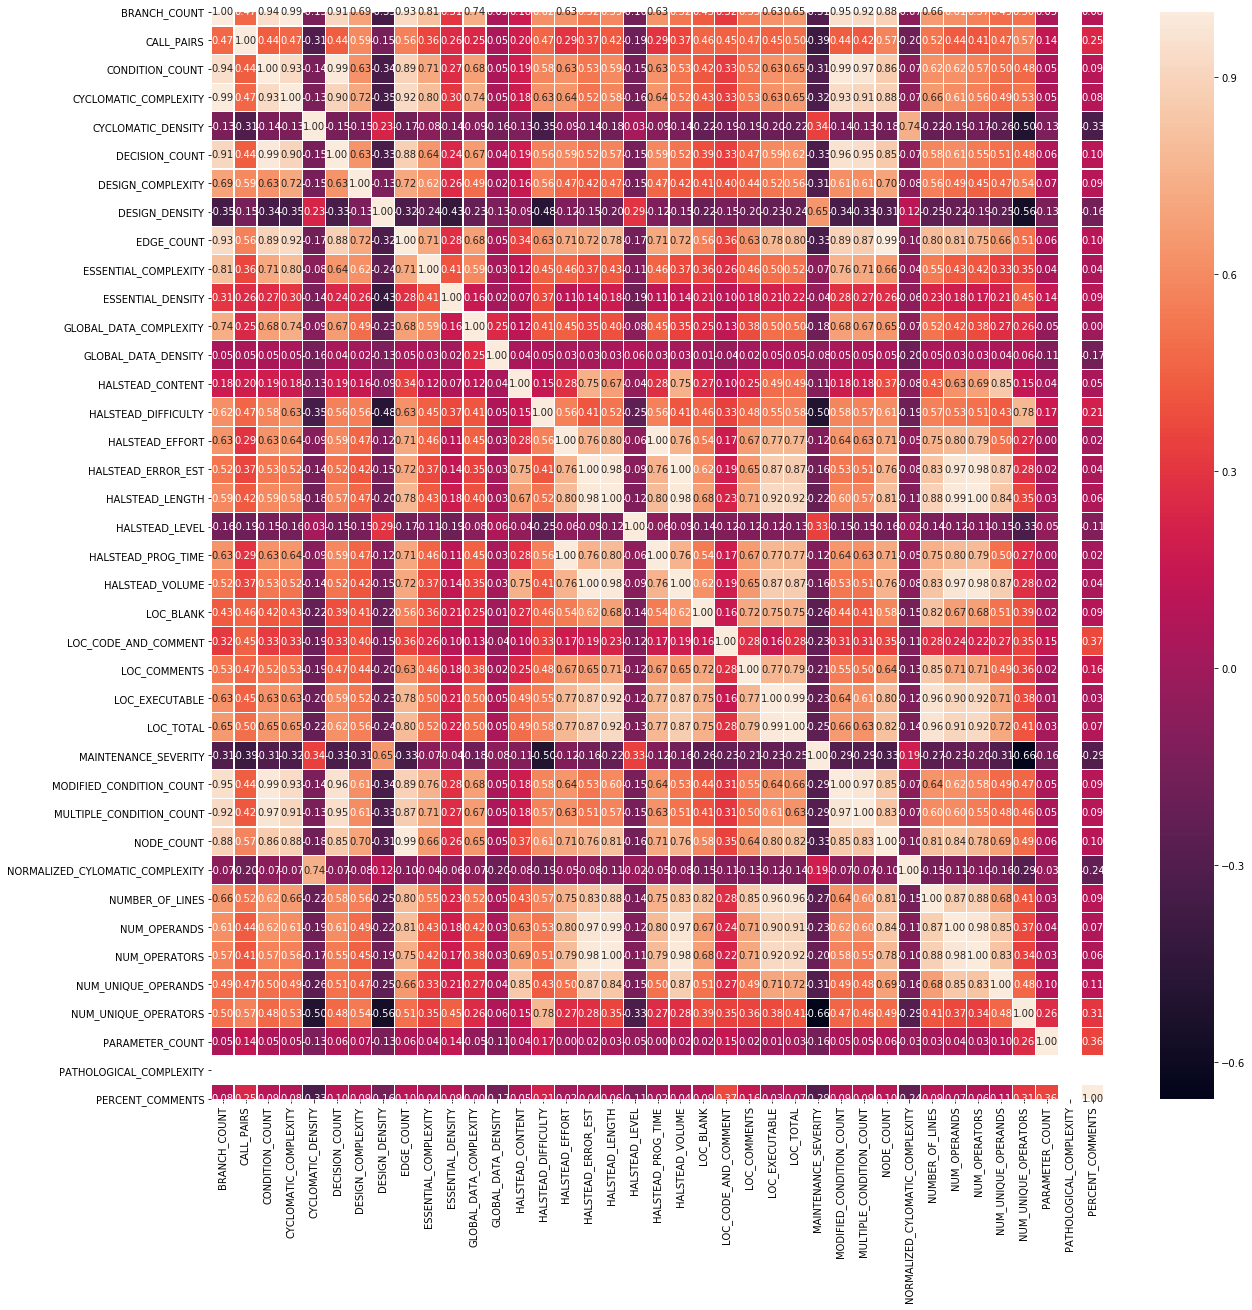

In [22]:
f,ax = plt.subplots(figsize = (20, 20))
sns.heatmap(newData.corr(), annot = True, linewidths = .2, fmt = '.2f')
plt.show()

### <span style="color:#336699">Referências</span>
<hr>
D. Gray, D. Bowes, N. Davey, Y. Sun and B. Christianson, "The misuse of the NASA metrics data program data sets for automated software defect prediction," 15th Annual Conference on Evaluation & Assessment in Software Engineering (EASE 2011), Durham, 2011, pp. 96-103.
doi: 10.1049/ic.2011.0012
keywords: {data mining;fault tolerant computing;NASA metrics data program data set;automated software defect prediction;data cleansing process},
URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6083167&isnumber=6083155